## Imports

In [35]:
from os import walk
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup


# Constant

In [2]:
SPAM_1_PATH = './SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = './SpamData/01_Processing/spam_assassin_corpus/spam_2/'

ESAY_NONSPAM_1_PATH = './SpamData/01_Processing/spam_assassin_corpus/easy_ham_1/'
ESAY_NONSPAM_2_PATH = './SpamData/01_Processing/spam_assassin_corpus/easy_ham_2/'
DATA_JSON_FILE = './SpamData/01_Processing/email_text_data.json'

# Contents

In [3]:
EXAMPLE_FILE = './SpamData/01_Processing/practice_email.txt'
stream = open(EXAMPLE_FILE)
message = stream.read()
print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [4]:
stream = open(EXAMPLE_FILE)

is_body = False;
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True


mess = '\n'.join(lines)

print(mess)

stream.close()



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [5]:
def generate_squares(N):
    for i in range(N):
        yield i ** 2

In [6]:
for i in generate_squares(9):
    print(i)

0
1
4
9
16
25
36
49
64


In [7]:
def email_body_generator(path):
    for root, dirnames, filenames in walk(path):
        for filename in filenames:
            filepath = join(root, filename)
            stream = open(filepath, encoding='latin-1')

            is_body = False
            lines = []
            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True
            stream.close()
            email_body = '\n'.join(lines)
            yield filename, email_body


In [8]:
def df_from_directory(path, classification):
    rows = []
    row_names = []

    for filename, email_body in email_body_generator(path):
        rows.append({'message': email_body, 'classification': classification})
        row_names.append(filename)
    return pd.DataFrame(rows, index=row_names)

In [9]:
spam_email1 = df_from_directory(SPAM_1_PATH, 0)
spam_email2 = df_from_directory(SPAM_2_PATH, 0)
spam_emails= pd.concat([spam_email1, spam_email2])
spam_emails

,message,classification
00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",0
00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,0
00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...,0
00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,0
00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,0
...,...,...
01311.43bfe86df65d53c5f7ca2365dc12582b,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",0
00851.dc5452f80ba0bb8481dfc48f70380c4d,<html>\n\n<HEAD> \n\n<TITLE>creditfix</TITLE> ...,0
01328.b23902de23cb3ca1f3334517282372b2,Hello:\n\n\n\nAre you satisfied with your ISP?...,0
01244.9ef966101737a6fc27d8965def288d70,<html><HEAD><TITLE>creditfix</TITLE> \n\n</HEA...,0


In [10]:
spam_emails.shape

(1898, 2)

In [11]:
ham_email1 = df_from_directory(ESAY_NONSPAM_1_PATH, 1)
ham_email2 = df_from_directory(ESAY_NONSPAM_2_PATH, 1)
ham_emails = pd.concat([ham_email1, ham_email2])
ham_emails

,message,classification
00769.25bf9a767b5db0ed93f03c1637281663,"\n\nIn a message dated 9/24/2002 11:24:58 AM, ...",1
01074.8590d61ac0aeeadb58dc2f2ba776c406,"Hiya, I always seem to get errors when I do an...",1
02479.14365bcad3a60fcf24c5c1813f6291fb,\n\nI don't know how one can expect better and...,1
01417.ce7b07a2114218dbac682b599785820d,Tim Peters wrote:\n\n> I've run no experiments...,1
00357.d559b71616f64ba1d1c1e61a03644fd4,"At 10:34 AM -0700 on 8/28/02, Jim Whitehead wr...",1
...,...,...
00609.dd49926ce94a1ea328cce9b62825bc97,"I'm one of the 30,000 but it's not working ver...",1
00957.e0b56b117f3ec5f85e432a9d2a47801f,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,1
01127.841233b48eceb74a825417d8d918abf8,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",1
01178.5c977dff972cd6eef64d4173b90307f0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1


In [12]:
ham_emails.shape

(3901, 2)

In [13]:
data = pd.concat([spam_emails, ham_emails])

print("Shape of entire data frame is", data.shape)

data

Shape of entire data frame is (5799, 2)


,message,classification
00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",0
00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,0
00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...,0
00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,0
00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,0
...,...,...
00609.dd49926ce94a1ea328cce9b62825bc97,"I'm one of the 30,000 but it's not working ver...",1
00957.e0b56b117f3ec5f85e432a9d2a47801f,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,1
01127.841233b48eceb74a825417d8d918abf8,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",1
01178.5c977dff972cd6eef64d4173b90307f0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1


In [14]:
null_count = data['message'].isnull().values.any()

In [15]:
empty_count = (data['message'].str.len() == 0).sum()

In [16]:
(data['message'].isnull().values).sum()

0

In [17]:
null_empty_count = null_count + empty_count
null_empty_count

3

In [18]:
empty_indices = data[data['message'].str.len() == 0].index
print(empty_indices)

Index(['cmds', 'cmds', 'cmds'], dtype='object')


In [19]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

In [20]:
data.drop(['cmds'], inplace=True)

In [21]:
empty_count = (data['message'].str.len() == 0).sum()
empty_count

0

In [22]:
data

,message,classification
00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",0
00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,0
00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...,0
00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,0
00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,0
...,...,...
00609.dd49926ce94a1ea328cce9b62825bc97,"I'm one of the 30,000 but it's not working ver...",1
00957.e0b56b117f3ec5f85e432a9d2a47801f,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,1
01127.841233b48eceb74a825417d8d918abf8,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",1
01178.5c977dff972cd6eef64d4173b90307f0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1


In [23]:
document_id = range(0, len(data.index))
data['DOC_ID'] = document_id
data

,message,classification,DOC_ID
00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",0,0
00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,0,1
00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...,0,2
00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,0,3
00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,0,4
...,...,...,...
00609.dd49926ce94a1ea328cce9b62825bc97,"I'm one of the 30,000 but it's not working ver...",1,5791
00957.e0b56b117f3ec5f85e432a9d2a47801f,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,1,5792
01127.841233b48eceb74a825417d8d918abf8,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",1,5793
01178.5c977dff972cd6eef64d4173b90307f0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1,5794


In [24]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace=True)
data

,message,classification,FILE_NAME
DOC_ID,,,
0,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",0,00249.5f45607c1bffe89f60ba1ec9f878039a
1,ATTENTION: This is a MUST for ALL Computer Use...,0,00373.ebe8670ac56b04125c25100a36ab0510
2,This is a multi-part message in MIME format.\n...,0,00214.1367039e50dc6b7adb0f2aa8aba83216
3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,0,00210.050ffd105bd4e006771ee63cabc59978
4,This is the bottom line. If you can GIVE AWAY...,0,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,"I'm one of the 30,000 but it's not working ver...",1,00609.dd49926ce94a1ea328cce9b62825bc97
5792,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,1,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",1,01127.841233b48eceb74a825417d8d918abf8


In [25]:
data.to_json(DATA_JSON_FILE)

In [26]:
data.classification.value_counts()

classification
1    3900
0    1896
Name: count, dtype: int64

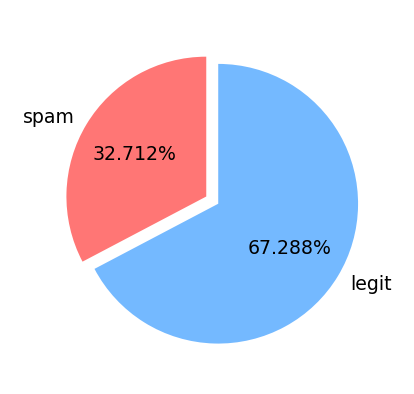

In [27]:
spam_email_count = data.classification.value_counts()[0]
ham_email_count = data.classification.value_counts()[1]

category_name = ['spam', 'legit']
sizes = [spam_email_count, ham_email_count]
custome_colors = ['#ff7675', '#74b9ff']

plt.figure(figsize=[2, 2], dpi=227)

plt.pie(sizes, labels=category_name, textprops={'fontsize': 6}, startangle=90, explode=[0, 0.1] , autopct='%1.3f%%' , colors= custome_colors )
plt.show()



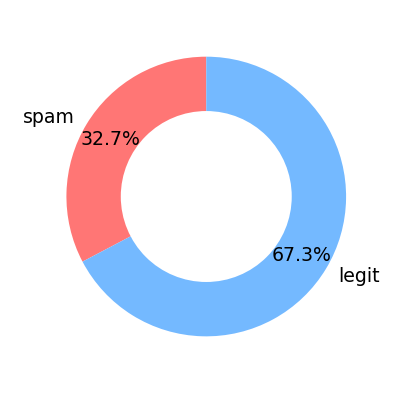

In [28]:
spam_email_count = data.classification.value_counts()[0]
ham_email_count = data.classification.value_counts()[1]

category_name = ['spam', 'legit']
sizes = [spam_email_count, ham_email_count]
custome_colors = ['#ff7675', '#74b9ff']

plt.figure(figsize=[2, 2], dpi=227)

ofset = [0.05, 0.05, 0.05, 0.05]

center_circle = plt.Circle((0, 0), radius=0.6, color='white' )


plt.pie(sizes, labels=category_name, textprops={'fontsize': 6}, startangle=90 , autopct='%1.1f%%' , pctdistance=0.8, colors= custome_colors,  )


plt.gca().add_artist(center_circle)

plt.show()



In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/reza_96/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reza_96/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stop_words = set(stopwords.words('english'))
type(stop_words)

set

In [32]:
if 'you' in stop_words: print('found') 

found


In [33]:
if 'hello' not in stop_words : print('Nope')

Nope


In [34]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be. ??? \
No expects the Spainsh Inqusition?'

words = word_tokenize(msg.lower())

stemmer = PorterStemmer()

fitered_word = []
for word in words:
    if word not in stop_words and word.isalpha() :
        stemed_word = stemmer.stem(word)
        fitered_word.append(stemed_word)


fitered_word

['work', 'play', 'make', 'jack', 'dull', 'boy', 'expect', 'spainsh', 'inqusit']

In [44]:
soup = BeautifulSoup(data.at[2, 'message'], 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of This is a multi-part message in MIME format.



------=_NextPart_000_1CDC19_01C25366.4B57F3A0

Content-Type: text/plain;

	charset="Windows-1252"

Content-Transfer-Encoding: quoted-printable



 We dare you...

 Try to find a better annuity!

=20

  - 5.40% Guaranteed for 6 Years=0A=

- 6 Year Surrender Charge=0A=

- 5% Agent

Commission up to age 80=09

Call today for more information!

 800-888-7641 ext. 103

- or -



Please fill out the form below for more information	=20

Name:	 	  =09

E-mail:	 	=20

Phone:	 	=20

City:	 	 State:	 	=20

 	    =09

=20

 PMG Financial Services

*5.40% for deposits of $100,000 and up, 5.25% interest for deposits

totalling $25,000-$99,999.	=20

We don't want anyone to receive our mailings who does not wish to

receive them. This is a professional communication sent to insurance

professionals. To be removed from this mailing list, DO NOT REPLY to

this message. Instead, go here: http://www.insuranceiq.com/optout

<http

In [45]:
soup.get_text()

'This is a multi-part message in MIME format.\n\n\n\n------=_NextPart_000_1CDC19_01C25366.4B57F3A0\n\nContent-Type: text/plain;\n\n\tcharset="Windows-1252"\n\nContent-Transfer-Encoding: quoted-printable\n\n\n\n We dare you...\n\n Try to find a better annuity!\n\n=20\n\n  - 5.40% Guaranteed for 6 Years=0A=\n\n- 6 Year Surrender Charge=0A=\n\n- 5% Agent\n\nCommission up to age 80=09\n\nCall today for more information!\n\n 800-888-7641 ext. 103\n\n- or -\n\n\n\nPlease fill out the form below for more information\t=20\n\nName:\t \t  =09\n\nE-mail:\t \t=20\n\nPhone:\t \t=20\n\nCity:\t \t State:\t \t=20\n\n \t    =09\n\n=20\n\n PMG Financial Services\n\n*5.40% for deposits of $100,000 and up, 5.25% interest for deposits\n\ntotalling $25,000-$99,999.\t=20\n\nWe don\'t want anyone to receive our mailings who does not wish to\n\nreceive them. This is a professional communication sent to insurance\n\nprofessionals. To be removed from this mailing list, DO NOT REPLY to\n\nthis message. Instead, g

In [50]:
def clean_message(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))): 
    filtered_words = []

    words = word_tokenize( message.lower())

    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    return filtered_words;

In [51]:
clean_message(email_body)

NameError: name 'email_body' is not defined

## Remove HTML TAG